<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Implemente un algoritmo de optimizacion por enjambre de partıculas
y utilıcelo para encontrar el mınimo global de las funciones del Ejercicio 1 de
la Guıa de trabajos practicos 6.
Compare los resultados en relacion a los obtenidos con algoritmos geneticos,
en terminos de las soluciones encontradas y la velocidad de convergencia.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
  x = x[0]
  return (-1)*x*np.sin(np.sqrt(np.abs(x)))
def f2(v):
  x=v[0]; y=v[1]
  return ((x**2 + y**2)**(0.25))*( np.sin(50*((x**2 + y**2)**(0.1)))**2 + 1)

In [3]:
def enjambre(particulas,f,c1,c2,minimo_buscado,iter_max):
    cantidad_particulas,dimensiones =particulas.shape
    particulas_mejor_posicion_individual = particulas
    mejor_posicion_global = particulas[0]
    velocidad_particulas = (np.random.rand(cantidad_particulas,dimensiones)-0.5)
    iter = 0
    while(f(mejor_posicion_global)>minimo_buscado  and iter != iter_max):
        for i in np.arange(0,cantidad_particulas):
            if (f(particulas[i])<f(particulas_mejor_posicion_individual[i])):
                particulas_mejor_posicion_individual[i] = particulas[i]
            if (f(particulas_mejor_posicion_individual[i])<f(mejor_posicion_global)):
                mejor_posicion_global = particulas_mejor_posicion_individual[i]
        for i in np.arange(cantidad_particulas):
            for j in np.arange(dimensiones):
                r = np.random.rand(2)
                velocidad_particulas[i][j]+= c1*r[0]*(particulas_mejor_posicion_individual[i][j]-particulas[i][j]) + c2*r[1]*(mejor_posicion_global[j]-particulas[i][j])
                particulas[i] += velocidad_particulas[i][j]
        iter +=1
    return mejor_posicion_global,iter

In [4]:
cantidad_particulas = 200
dimensiones = 1
minimo_buscado = -10000
particulas = (np.random.rand(cantidad_particulas,dimensiones)*500 - 250)
c1 = 0.5 ; c2= 0.5 ; iter_max = 500
mejor_posicion_global,iter = enjambre(particulas,f1,c1,c2,minimo_buscado,iter_max)

In [ ]:
print('Cantidad de iteraciones: ',iter)
print('Individuo con mejor fitness: ',mejor_posicion_global)
print('Mejor fitness encontrado: ',f1(mejor_posicion_global))
x = np.linspace(-20000, 20000,num=10000)
y = f1([x])
plt.plot(x,y,'b-')
plt.plot(mejor_posicion_global,f1(mejor_posicion_global),'*r')
plt.title('Funcion −x*sin(sqrt(|x|))')
plt.xlabel('valor de x: individuo')
plt.ylabel('valor de y: fitness')
plt.grid() ;plt.show()

In [6]:
cantidad_particulas = 200
dimensiones = 2
minimo_buscado = 1.5
particulas = (np.random.rand(cantidad_particulas,dimensiones)*500 - 250)

c1 =  0.01; c2= 0.01 ; iter_max = 1000
mejor_posicion_global,iter = enjambre(particulas,f2,c1,c2,minimo_buscado,iter_max)

Cantidad de iteraciones:  43
Individuo con mejor fitness:  [-1.05950127  0.17925499]
Mejor fitness encontrado:  1.2399330077732929


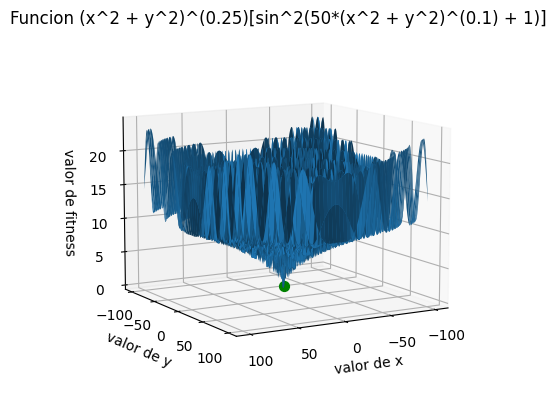

In [7]:
print('Cantidad de iteraciones: ',iter)
print('Individuo con mejor fitness: ',mejor_posicion_global)
print('Mejor fitness encontrado: ',f2(mejor_posicion_global))
x = y = np.linspace(-100, 100,num=200)
x, y = np.meshgrid(x, y)
z = f2([x,y])
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(x, y, z)
ax.scatter(mejor_posicion_global[0], mejor_posicion_global[1], f2([mejor_posicion_global[0],mejor_posicion_global[1]]), color='green', s=50)
ax.set_title('Funcion (x^2 + y^2)^(0.25)[sin^2(50*(x^2 + y^2)^(0.1) + 1)]')
ax.set_xlabel('valor de x')
ax.set_ylabel('valor de y')
ax.set_zlabel('valor de fitness')
ax.view_init(elev=10, azim=60) ; plt.show()